In [2]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

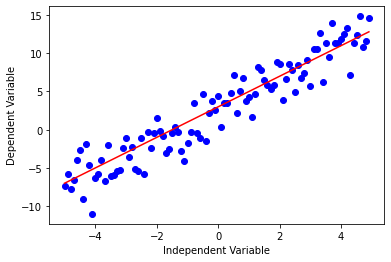

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

# You can adjust the slope and intercept to verify the chances in the graph

y = 2 * (x) + 3

y_noise = 2 * np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. 

Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. 

For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

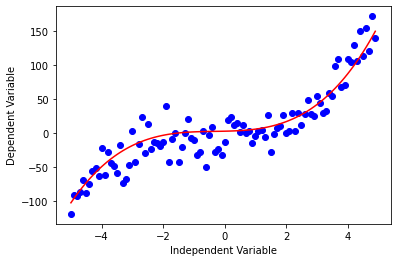

In [18]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1 * (x ** 3) + 1 * (x ** 2) + 1 * x + 3

y_noise = 20 * np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Quadratic

$$ Y = X^2 $$

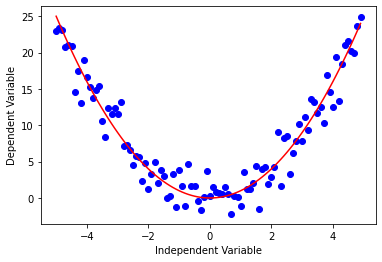

In [20]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x, 2)
y_noise = 2 * np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Exponential

An exponential function with base c is defined by:

$$ Y = a + bc^x $$

where b ≠ 0, c > 0, c ≠ 1 and x is a real number.

The base c is constant and the exponent x is a variable.


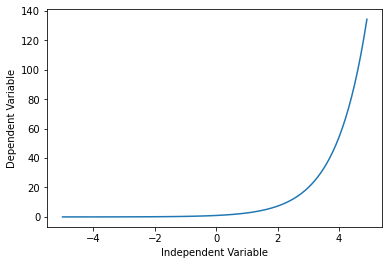

In [21]:
x = np.arange(-5.0, 5.0, 0.1)

Y = np.exp(x)

plt.plot(x, Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

plt.show()

## Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. 

It is one of the simplest form of `log()`: 

$$ y = \log(x)$$

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


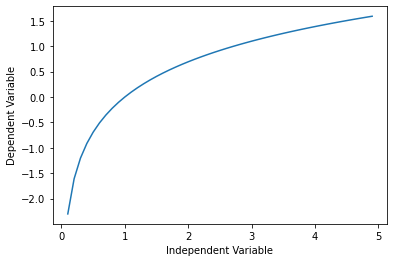

In [23]:
X = np.arange(-5.0, 5.0, 0.1)

y = np.log(X)

plt.plot(X, y)
plt.ylabel("Dependent Variable")
plt.xlabel('Independent Variable')
plt.show()

## Sigmoidal/Logistic

$$Y = a + \frac {b} {1 + c^{(X - d)}}$$

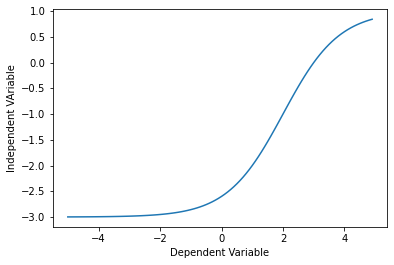

In [24]:
x = np.arange(-5.0, 5.0, 0.1)

Y = 1 - 4/(1 + np.power(3, x - 2))

plt.plot(x, Y)
plt.xlabel('Dependent Variable')
plt.ylabel('Independent VAriable')
plt.show()

## Example

In [25]:
import numpy as np
import pandas as pd

# Downloading data set

!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

df = pd.read_csv('china_gdp.csv')

df.head()

2020-07-25 17:46:31 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [35]:
df.shape

(55, 2)

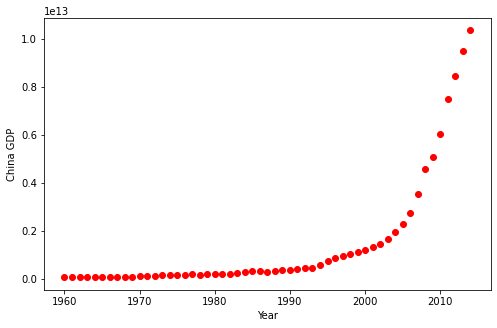

In [26]:
# Plotting dataset

plt.figure(figsize = (8, 5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel('Year')
plt.ylabel('China GDP')
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end

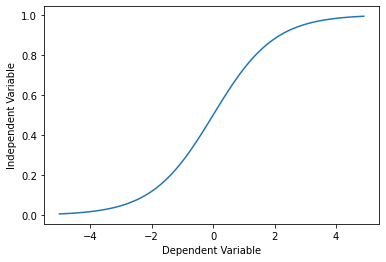

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y)
plt.xlabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.show()

the formula of the logistic function is the following:

$$ \hat y = \frac {1}{1 + e^{\beta_1(x - \beta_2)}}$$

$\beta_1$: Controls the curve's steepness

$\beta_2$: Slides the curve on the x-axis 

## Building the model

In [30]:
def sigmoid(x, beta_1, beta_2):
    
    y = 1 / (1 + np.exp(- beta_1 * (x - beta_2)))
    
    return y

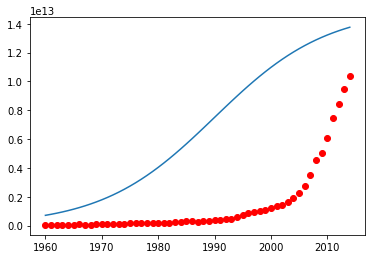

In [31]:
beta_1 = 0.1
beta_2 = 1990.0

# logistic function

y_pred = sigmoid(x_data, beta_1, beta_2)

# plot initial prediction against datapoints

plt.plot(x_data, y_pred * 15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [32]:
# Normalize the data

xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

### How we find the best parameters for our fit line?

we can use `curve_fit` which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [33]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

# print the final parameters

print('Beta_1 = %f, Beta_2 = %f' % (popt[0], popt[1]))

Beta_1 = 690.451711, Beta_2 = 0.997207


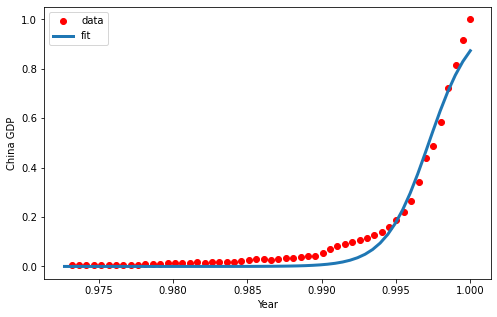

In [34]:
# plot the resulting regression model

x = np.linspace(1960, 2015, 55)
x = x / max(x)

plt.figure(figsize = (8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x, y, linewidth = 3.0, label = 'fit')
plt.legend(loc = 'best')
plt.ylabel('China GDP')
plt.xlabel('Year')
plt.show()